In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Neccessary Libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
##PRE-PROCESSING
#Null value: 0
#Duplicate: 0

initial_dataset = pd.read_csv('/content/drive/MyDrive/CSE424/new_model.csv.xls')
initial_dataset.head()

initial_dataset.info()

initial_dataset.isnull().sum()

initial_dataset[initial_dataset.duplicated()]

initial_dataset.shape  #shows (row and column) size in dataset

#statistical measures about the data
initial_dataset.describe()

for item in initial_dataset.columns:
    print(item,"=>",len(initial_dataset[item].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB
Bp => 11
Sg => 5
Al => 6
Su => 6
Rbc => 2
Bu => 118
Sc => 85
Sod => 35
Pot => 41
Hemo => 116
Wbcc => 90
Rbcc => 46
Htn => 3
Class => 2


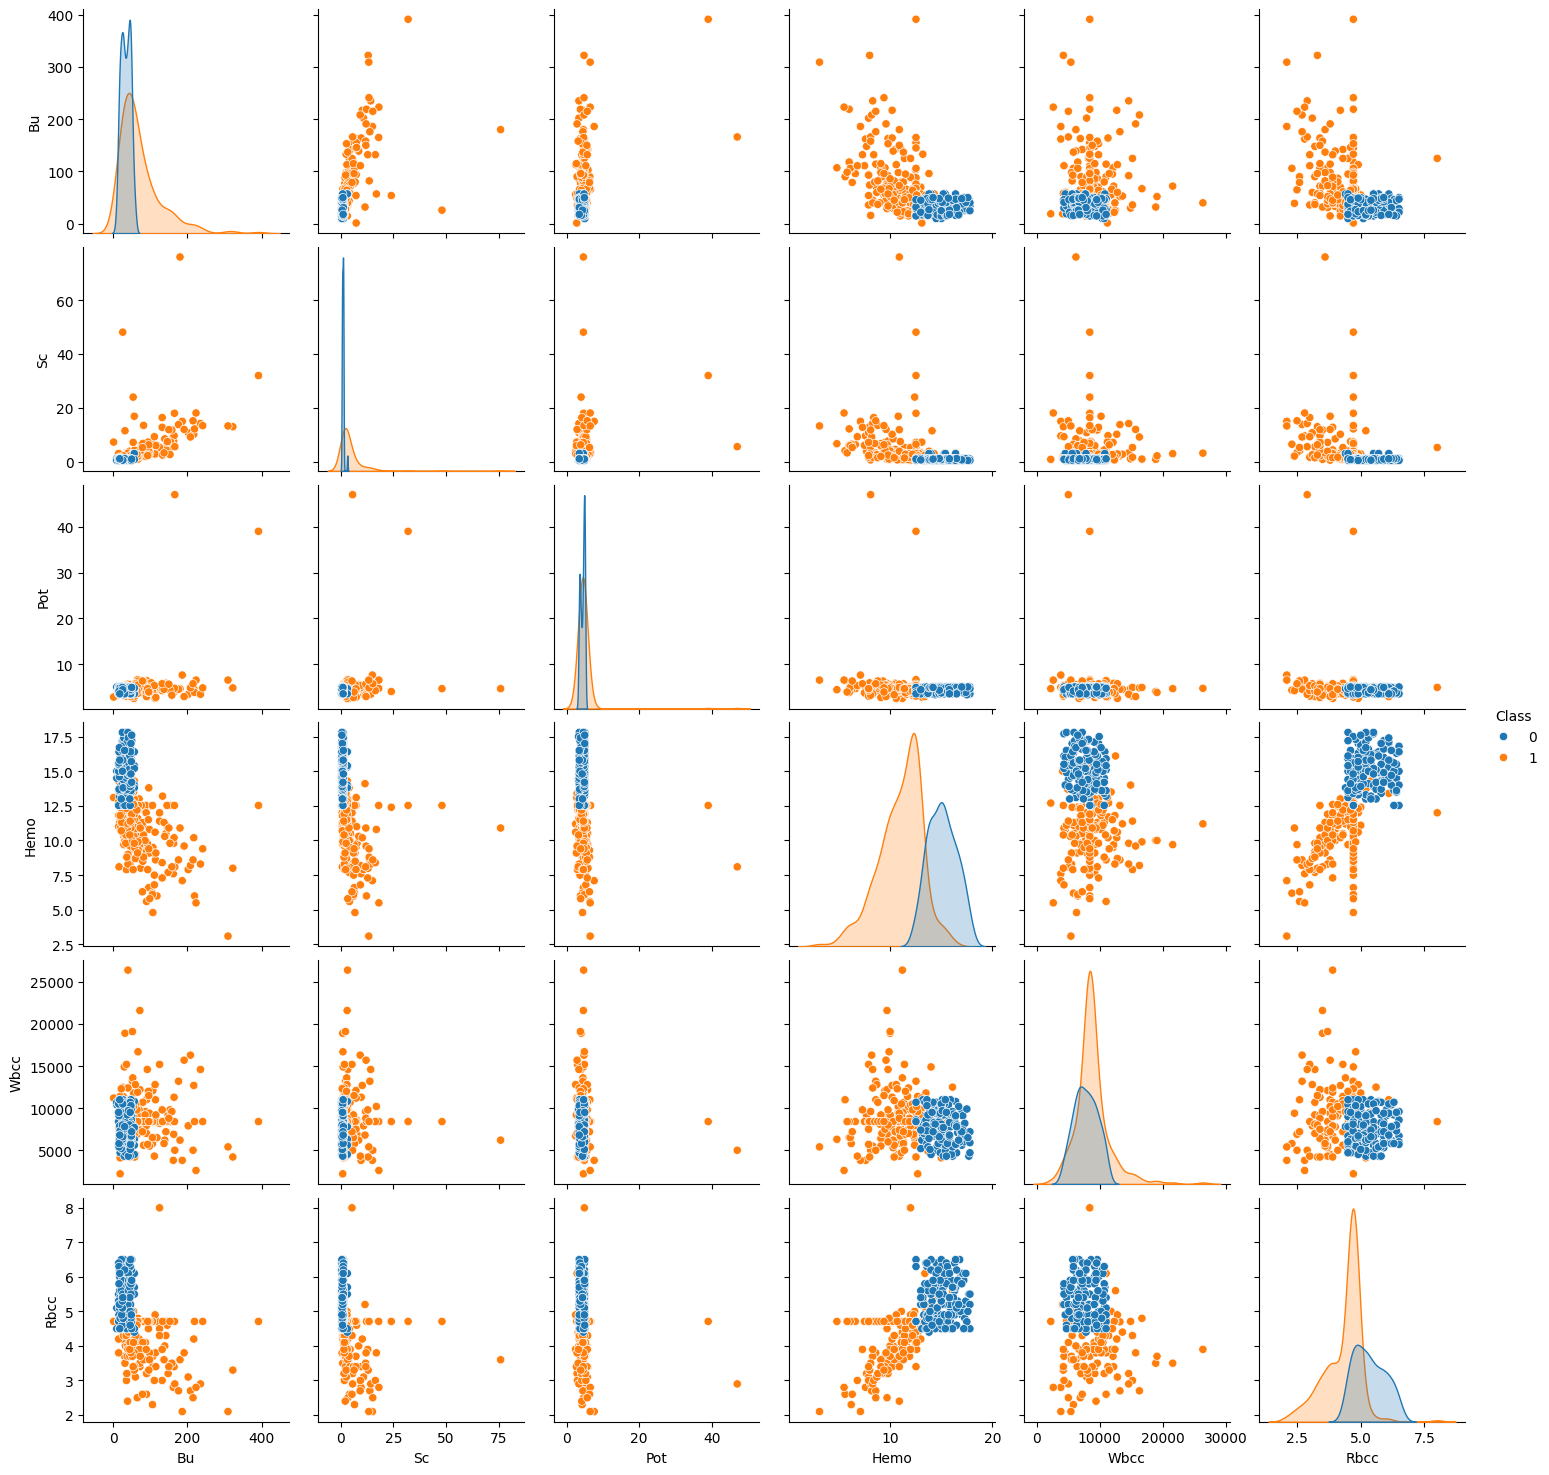

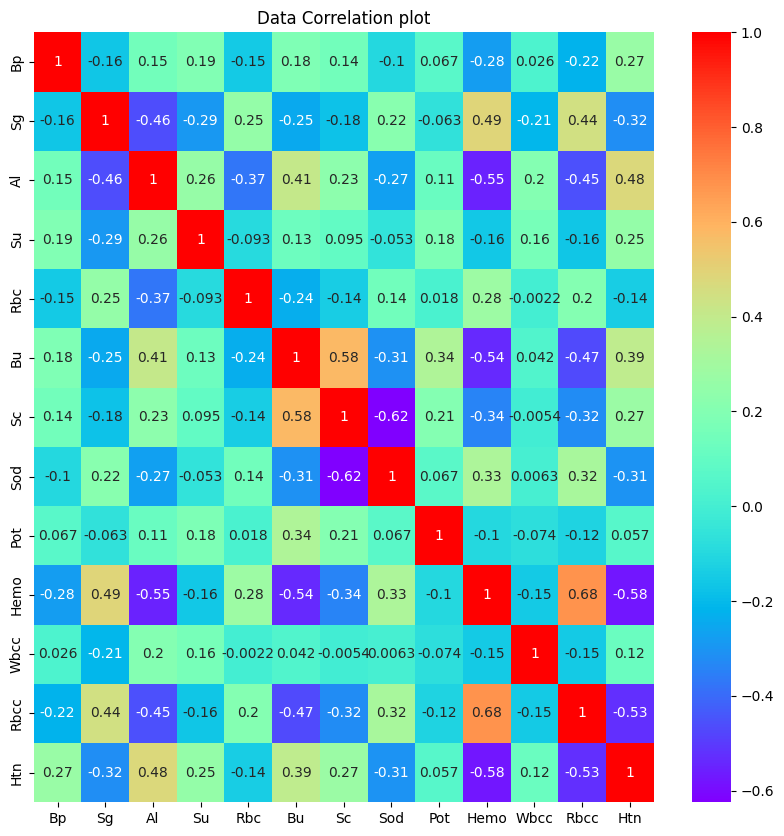

1    250
0    150
Name: Class, dtype: int64

In [ ]:
## Visualisation of dataset
# Feature and label

col = ["Bu","Sc","Pot","Hemo","Wbcc","Rbcc","Class"] # Pairplot figure to show correlation betweean features
sns.pairplot(initial_dataset[col],hue="Class")

# Using Heatmap to show correlation between features
features = initial_dataset.drop(initial_dataset.columns[-1],axis=1) # drop 'Class' column- not a feature
fig = plt.figure(figsize=(10, 10))
corr_plot = sns.heatmap(features.corr(),annot = True, cmap = 'rainbow' )
plt.title("Data Correlation plot")
plt.show()

#checking the distribution
initial_dataset["Class"].value_counts()
#0---- Healthy Kidney
#1-----defected kidney

In [ ]:
## SPLIT DATA AND TRAIN"""

X = initial_dataset.drop(['Class'], axis = 1)
Y = initial_dataset[['Class']]

X.info()

Y.info()

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)
print(X.shape,X_train.shape,X_test.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
dtypes: float64(13)
memory usage: 40.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   400 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB
(400, 13) (280, 13) (120, 13)


Logistic Regression accuracy: 93.33333333333333


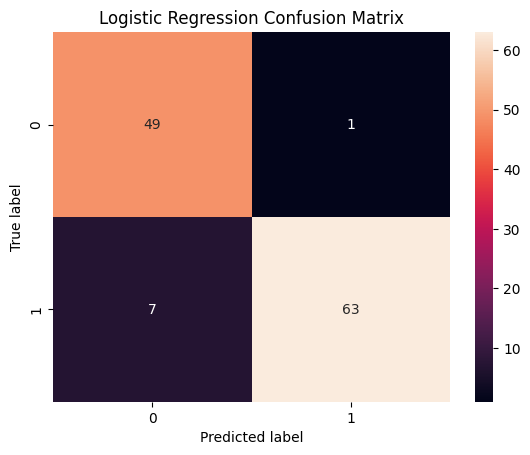

In [ ]:
## Logistic regression"""

from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression(random_state=1, solver='lbfgs',multi_class='auto', max_iter=500)
LR_model.fit(X_train,Y_train.values.ravel())

x=LR_model.predict(X_test)
x

s=LR_model.score(X_test,Y_test)
LR=s*100
print('Logistic Regression accuracy:', s*100)

from sklearn.metrics import confusion_matrix,classification_report
plt.figure()
sns.heatmap(confusion_matrix(Y_test, x), annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Logistic Regression Confusion Matrix");

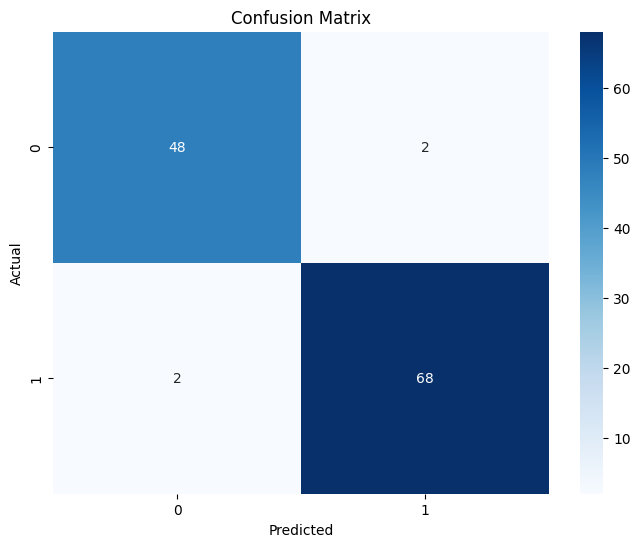

Decision Tree Classifier Accuracy : 96.66666666666667


In [ ]:
# Decision tree classifier"""
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)
score = clf.score(X_test,Y_test)
DTC = score*100

Y_pred = clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("Decision Tree Classifier Accuracy :", score*100)

KNeighborsClassifier accuracy: 86.0


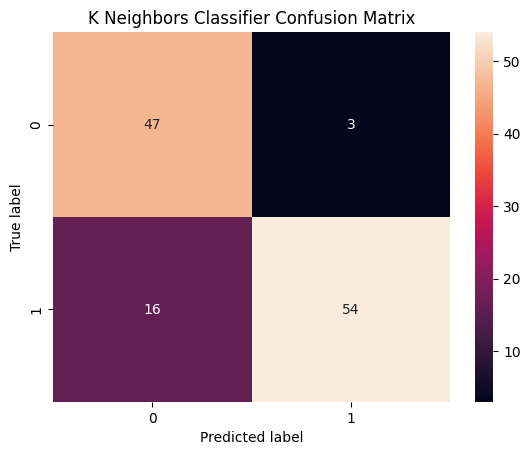

In [ ]:
## KNeighbors classifier"""

from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(features,Y.values.ravel())

s=KNN_model.score(features,Y)
KNN=s*100
print('KNeighborsClassifier accuracy:', s*100)

x=KNN_model.predict(X_test)


from sklearn.metrics import confusion_matrix,classification_report
plt.figure()
sns.heatmap(confusion_matrix(Y_test, x), annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("K Neighbors Classifier Confusion Matrix");

Naive Bayes Accuracy : 91.66666666666666


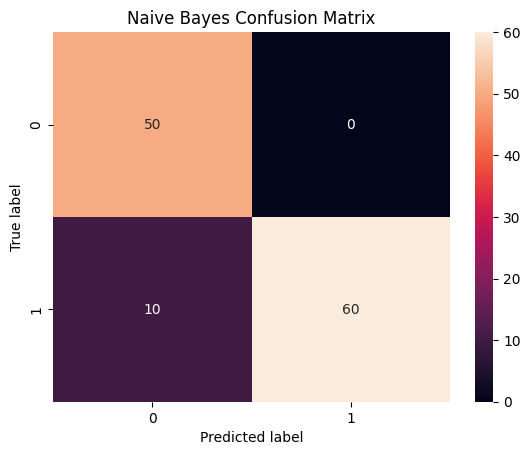

In [ ]:
## Naive Bayes"""

from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train,Y_train.values.ravel())

score = NB_model.score(X_test,Y_test)
NB=score*100
print("Naive Bayes Accuracy :", score*100)

x=NB_model.predict(X_test)


from sklearn.metrics import confusion_matrix,classification_report
plt.figure()
sns.heatmap(confusion_matrix(Y_test, x), annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Naive Bayes Confusion Matrix");

Highest accuracy: 96.66666666666667 ( RFC Model )



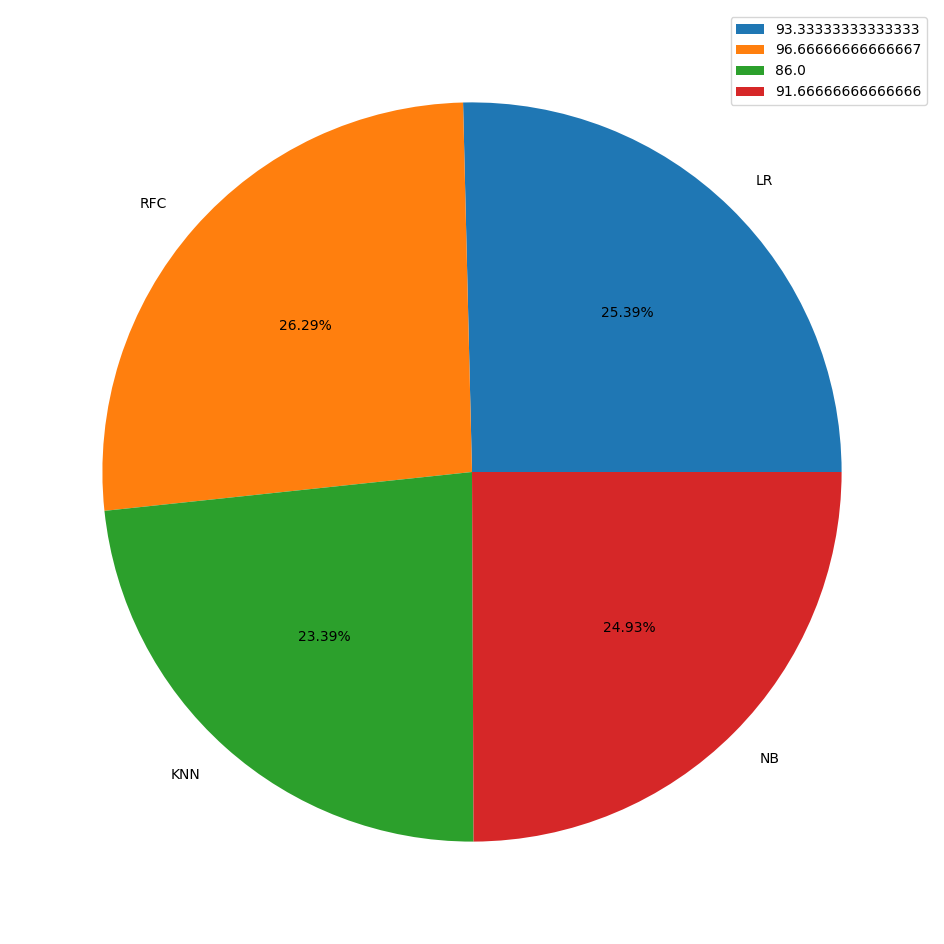

NameError: name 'RF' is not defined

In [ ]:
# Analysis
LR = 93.33333333333333
RFC = 96.66666666666667
KNN = 86.0
NB = 91.66666666666666
plt.figure(figsize=(12,12))
col=[LR,RFC,KNN,NB]
name=['LR','RFC','KNN','NB']
print('Highest accuracy:',max(col),'(',name[col.index(max(col))],'Model )\n')
plt.pie(col,labels=name,autopct='%.2f%%')
plt.legend(col)
plt.show()

from sklearn.model_selection import cross_val_score
algorithms = [LR_model,KNN_model,RF,NB_model]
for alg in algorithms:
    accuracies = cross_val_score(estimator=alg, X=features, y=Y, cv=10)
    print("{0}: \t {1}".format(alg,accuracies.mean()))

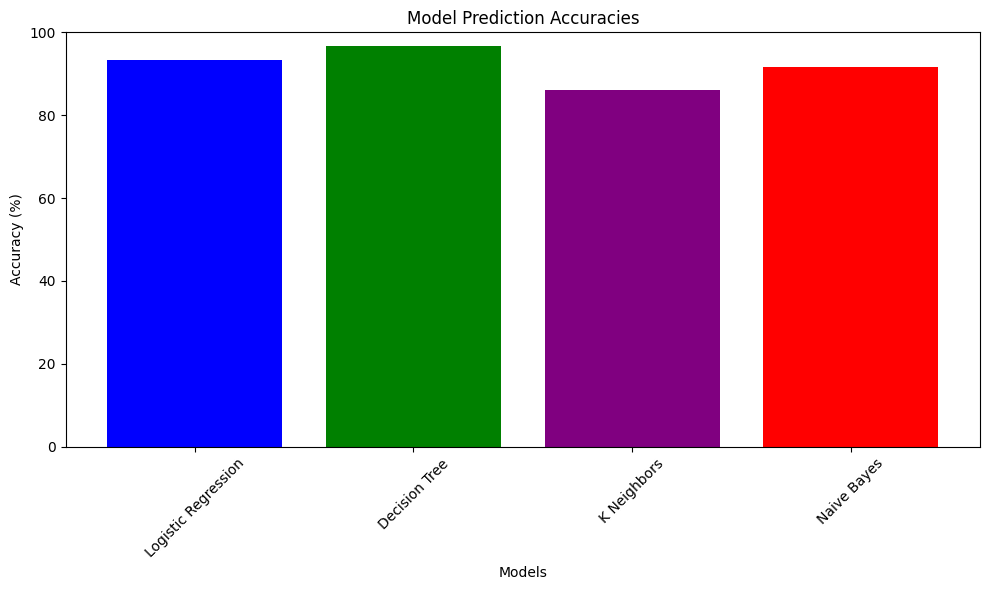

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores of different models
models = ['Logistic Regression', 'Decision Tree','K Neighbors', 'Naive Bayes']
accuracies = [LR, DTC, KNN, NB]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'purple', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Prediction Accuracies')
plt.ylim([0, 100])  # Set the y-axis limit
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
